<a href="https://colab.research.google.com/github/UmaAgrawal501/uma-wasserstoff-AiInternTask/blob/main/ImageSegmentation_Mask_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Require library

In [ ]:
import cv2
import numpy as np

Read Image

In [ ]:
img = cv2.imread('/content/drive/MyDrive/image segmentation/text4.jpg',0)
height, width = img.shape
print(height,width)


4000 6000


Show Image

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
cv2_imshow(img)

For example, here we download and display a PNG image of the Colab logo:

Import Mask R-CNN model

In [ ]:
net = cv2.dnn.readNetFromTensorflow("/content/drive/MyDrive/dnn/frozen_inference_graph.pb",
                                    "/content/drive/MyDrive/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt")

Detect Objects

In [ ]:
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)
net.setInput(blob)
boxes, masks = net.forward(["detection_out_final", "detection_masks"])
detection_count = boxes.shape[2]
print(masks)



[[[[2.54985713e-03 5.03171992e-04 2.05555130e-04 ... 5.53325377e-03
    2.27988753e-02 1.14711508e-01]
   [1.23686204e-03 2.99634092e-04 1.20252691e-04 ... 3.80369164e-02
    4.29187953e-01 7.71827340e-01]
   [1.33160909e-03 4.18227544e-04 3.02638829e-04 ... 8.29574108e-01
    9.88890886e-01 9.82368171e-01]
   ...
   [4.43827137e-02 2.25191057e-01 7.20619559e-01 ... 5.10404468e-01
    2.30726600e-01 1.98740125e-01]
   [1.28234783e-02 7.40931034e-02 4.24406111e-01 ... 1.97213426e-01
    3.84906530e-02 4.40289564e-02]
   [7.09587056e-03 2.52359193e-02 1.34006709e-01 ... 2.33956724e-02
    9.02314391e-03 9.89222899e-03]]

  [[4.05698232e-02 2.07261369e-02 1.48790879e-02 ... 1.34614611e-03
    2.64321477e-03 2.20917594e-02]
   [5.14565594e-02 4.36575152e-02 3.18465419e-02 ... 3.98880988e-03
    2.36217957e-02 1.37136593e-01]
   [1.03742488e-01 1.12597458e-01 1.02578469e-01 ... 1.42267406e-01
    2.95913637e-01 3.71662825e-01]
   ...
   [1.34438664e-01 2.25412413e-01 3.08550417e-01 ... 4.45

In [ ]:
for i in range(detection_count):
    box = boxes[0, 0, i, :]
    class_id = int(box[1])
    score = box[2]

# Get box coordinates
    x = int(max(0, box[3] * width))
    y = int(max(0, box[4] * height))
    x2 = int(min(width, box[5] * width))
    y2 = int(min(height, box[6] * height))

    if x < x2 and y < y2:  # Check if the ROI is valid
        roi = img[y: y2, x: x2]
        roi_height, roi_width = roi.shape[:2]  # Handle both 2D and 3D ROIs
#Get the mask
        mask = masks[i, class_id]
        mask = cv2.resize(mask, (roi_width, roi_height))
        _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)
        cv2_imshow(mask)
        cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 3)
        cv2_imshow(img)
        cv2.waitKey(0)
    else:
        print(f"Invalid bounding box for detection {i}: ({x}, {y}), ({x2}, {y2})")

Get mask coordinates

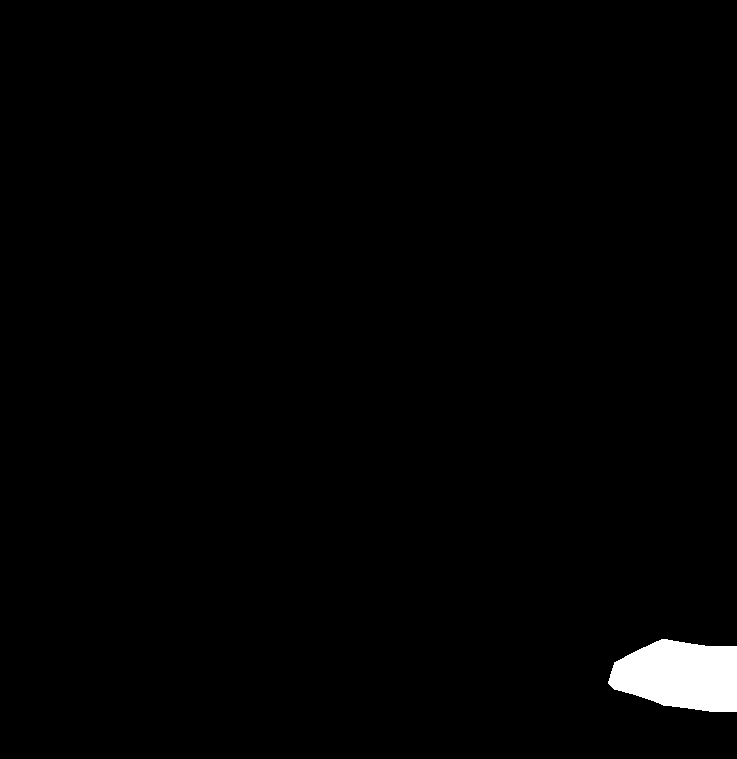

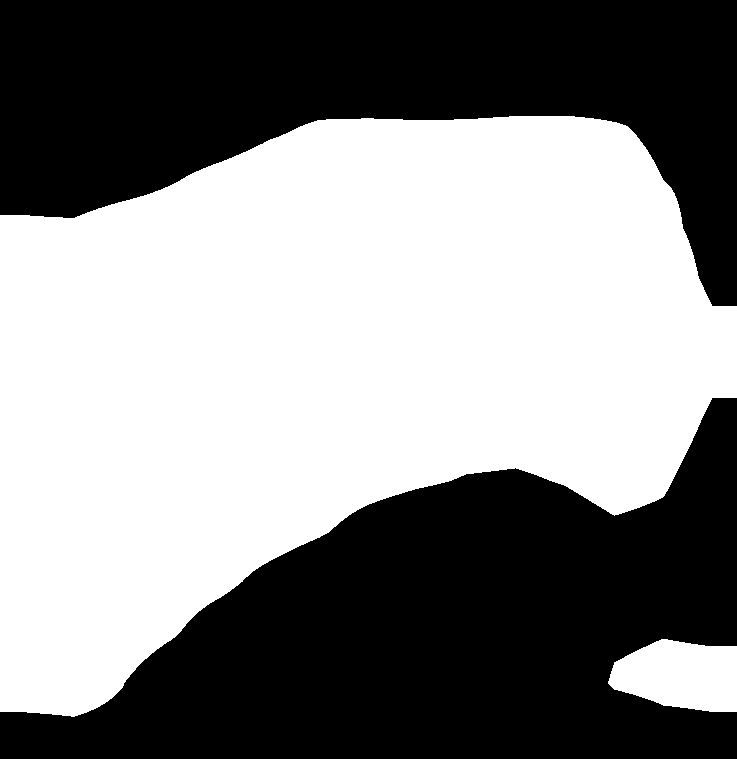

In [ ]:
mask.astype(np.uint8)
roi = np.zeros_like(mask)
contours, _ = cv2.findContours(np.array(mask, np.uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
  cv2.fillPoly(roi, [contour], color=(255,0,0))
  cv2_imshow(roi)
  cv2.waitKey(0)
